In [4]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter
from target import SingerModel
from simulation import simulate_on_trajectory, create_trajectory
from tracking import ResidualUpdatePolicy
from radar import MonostaticRadar

In [5]:
tracker = KalmanFilter(dim_x=3, dim_z=1)
target = SingerModel(1, 1, np.zeros(3))
update_policy = ResidualUpdatePolicy()
radar = MonostaticRadar(10, 0.0001, 2)

<IPython.core.display.Javascript object>


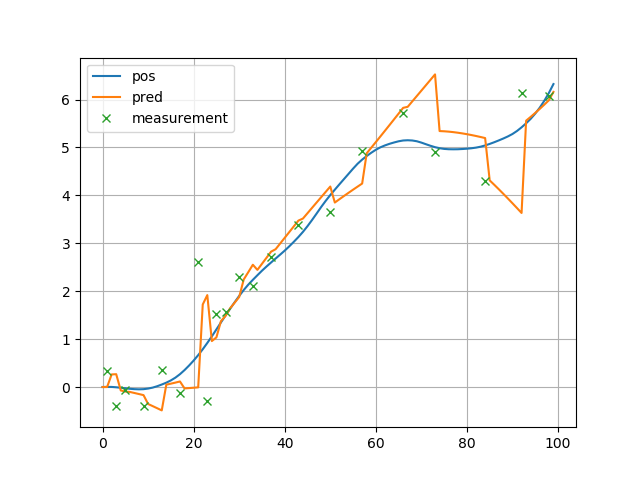

39.38829564911354

In [238]:
target.reset()
dt = 0.1
R = np.eye(1)
tracker.x = target.x
tracker.P = np.eye(3)
tracker.F = target.F(dt)
tracker.Q = target.Q(dt)
tracker.R = R
tracker.H = np.array([[1, 0, 0]])
update_policy.K = 1
N = 100

np.random.seed(2)
trajectory = create_trajectory(target, dt, N)
data = simulate_on_trajectory(trajectory, tracker, radar, update_policy)

plt.figure()
plt.plot(trajectory[:, 0], label='pos')
plt.plot(data['predictions'][:, 0], label='pred')
plt.plot(data['measurement_indexes'], data['measurements'], 'x', label='measurement')
plt.grid(True)
plt.legend()
np.sum(np.abs(trajectory[:, 0] - data['predictions'][:, 0]))

<IPython.core.display.Javascript object>


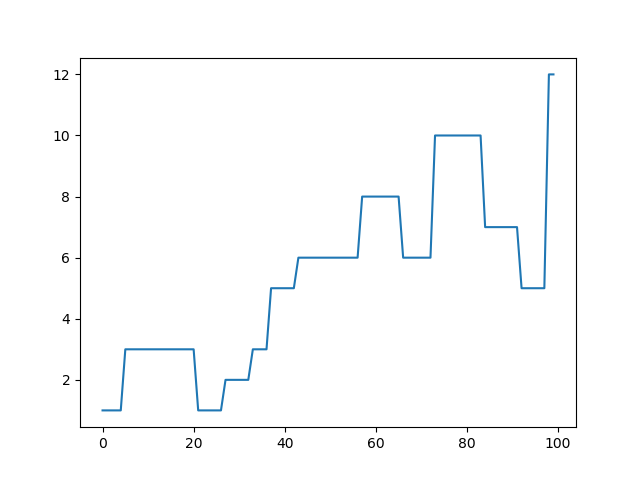

In [239]:
plt.figure()
plt.plot(data['intervals'])
plt.show()

In [ ]:
plt.figure()
plt.plot(np.abs(predictions[:,0]-states[:, 0]))

In [ ]:
plt.figure()
t = np.linspace(0.1, 4)
plt.plot(t, np.exp(t)/t)
plt.show()

In [ ]:
np.log(0)